In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
#3rd assessment - DT, RF, KNN, Kmeans, SVM
df2 = pd.read_excel(r"C:\Users\rajha\Downloads\Data set.xlsx", sheet_name=2)

In [4]:
## data processing by handling missing values data is huge so we can delete the null 
df2.dropna(inplace=True)


In [5]:
#encoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['workclass'] = le.fit_transform(df2['workclass'])
df2['education'] = le.fit_transform(df2['education'])
df2['occupation'] = le.fit_transform(df2['occupation'])
df2['sex'] = le.fit_transform(df2['sex'])
df2['marital-status'] = le.fit_transform(df2['marital-status'])
df2['native-country'] = le.fit_transform(df2['native-country'])
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,Not-in-family,White,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,Husband,White,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,Not-in-family,White,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,Husband,Black,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,Wife,Black,0,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,4,245211,9,13,4,10,Own-child,White,1,0,0,40,39,<=50K.
48837,39,4,215419,9,13,0,10,Not-in-family,White,0,0,0,36,39,<=50K.
48839,38,4,374983,9,13,2,10,Husband,White,1,0,0,50,39,<=50K.
48840,44,4,83891,9,13,0,1,Own-child,Asian-Pac-Islander,1,5455,0,40,39,<=50K.


In [6]:
df2['income'].unique()
income_mapping = {'<=50K': 'Low Income', '>50K': 'High Income', '<=50K.': 'Low Income', '>50K.': 'High Income'}
# Replace the values in the 'income' column using the mapping
df2['new_income'] = df2['income'].replace(income_mapping)

# Check the unique values in the new 'new_income' column
unique_values_mapped = df2['new_income'].unique()
print(unique_values_mapped)

# Modify the 'income' column directly using the mapping
df2['income'].replace(income_mapping, inplace=True)
df2

['Low Income' 'High Income']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_income
0,39,7,77516,9,13,4,1,Not-in-family,White,1,2174,0,40,39,Low Income,Low Income
1,50,6,83311,9,13,2,4,Husband,White,1,0,0,13,39,Low Income,Low Income
2,38,4,215646,11,9,0,6,Not-in-family,White,1,0,0,40,39,Low Income,Low Income
3,53,4,234721,1,7,2,6,Husband,Black,1,0,0,40,39,Low Income,Low Income
4,28,4,338409,9,13,2,10,Wife,Black,0,0,0,40,5,Low Income,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,4,245211,9,13,4,10,Own-child,White,1,0,0,40,39,Low Income,Low Income
48837,39,4,215419,9,13,0,10,Not-in-family,White,0,0,0,36,39,Low Income,Low Income
48839,38,4,374983,9,13,2,10,Husband,White,1,0,0,50,39,Low Income,Low Income
48840,44,4,83891,9,13,0,1,Own-child,Asian-Pac-Islander,1,5455,0,40,39,Low Income,Low Income


In [7]:
df2.drop("new_income", axis=1, inplace = True)
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,Not-in-family,White,1,2174,0,40,39,Low Income
1,50,6,83311,9,13,2,4,Husband,White,1,0,0,13,39,Low Income
2,38,4,215646,11,9,0,6,Not-in-family,White,1,0,0,40,39,Low Income
3,53,4,234721,1,7,2,6,Husband,Black,1,0,0,40,39,Low Income
4,28,4,338409,9,13,2,10,Wife,Black,0,0,0,40,5,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,4,245211,9,13,4,10,Own-child,White,1,0,0,40,39,Low Income
48837,39,4,215419,9,13,0,10,Not-in-family,White,0,0,0,36,39,Low Income
48839,38,4,374983,9,13,2,10,Husband,White,1,0,0,50,39,Low Income
48840,44,4,83891,9,13,0,1,Own-child,Asian-Pac-Islander,1,5455,0,40,39,Low Income


In [12]:
x = df2.drop(["fnlwgt", "relationship", "race", "income", "education-num", "workclass", "capital-gain", "capital-loss", "native-country"], axis="columns")
y = df2['income']
df2['income'] = le.fit_transform(df2['income'])
x.corr()

,age,education,marital-status,occupation,sex,hours-per-week
age,1.000000,-0.009735,-0.265144,-0.014986,0.086811,0.079306
education,-0.009735,1.000000,-0.039867,-0.022207,-0.027251,0.057717
marital-status,-0.265144,-0.039867,1.000000,-0.005760,-0.126515,-0.184706
occupation,-0.014986,-0.022207,-0.005760,1.000000,0.069735,0.060587
sex,0.086811,-0.027251,-0.126515,0.069735,1.000000,0.230097
hours-per-week,0.079306,0.057717,-0.184706,0.060587,0.230097,1.000000


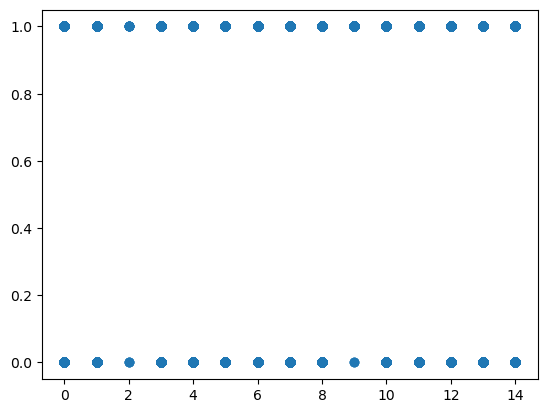

In [13]:
plt.scatter(df2['occupation'], df2['income'])
# plt.scatter(df2['education'], df2['income'], c=df2['income'])
# plt.xlabel('Education')
# plt.ylabel('Income')
# plt.title('Scatter Plot of Income vs Education')
# plt.colorbar(label='Income')
# plt.show()

In [14]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [16]:
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [17]:
knn.score(x_test, y_test)

0.8226771653543307

<function matplotlib.pyplot.show(close=None, block=None)>

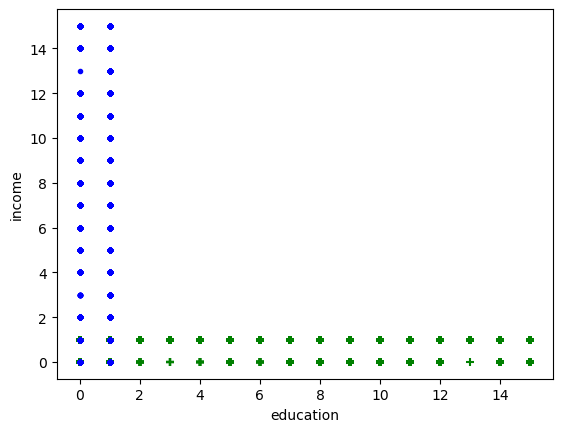

In [18]:
df0 = df2["education"]
df1 = df2["income"]
plt.xlabel('education')
plt.ylabel('income')

plt.scatter(df0, df1, color="green", marker='+',  label='education') 
plt.scatter(df1, df0, color="blue", marker='.', label='income')

plt.show

In [27]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1321,  944],
       [ 718, 6542]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

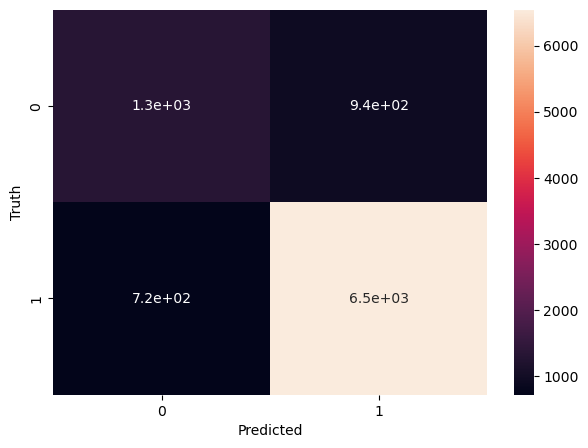

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 High Income       0.65      0.58      0.61      2265
  Low Income       0.87      0.90      0.89      7260

    accuracy                           0.83      9525
   macro avg       0.76      0.74      0.75      9525
weighted avg       0.82      0.83      0.82      9525



In [19]:
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,Not-in-family,White,1,2174,0,40,39,1
1,50,6,83311,9,13,2,4,Husband,White,1,0,0,13,39,1
2,38,4,215646,11,9,0,6,Not-in-family,White,1,0,0,40,39,1
3,53,4,234721,1,7,2,6,Husband,Black,1,0,0,40,39,1
4,28,4,338409,9,13,2,10,Wife,Black,0,0,0,40,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,4,245211,9,13,4,10,Own-child,White,1,0,0,40,39,1
48837,39,4,215419,9,13,0,10,Not-in-family,White,0,0,0,36,39,1
48839,38,4,374983,9,13,2,10,Husband,White,1,0,0,50,39,1
48840,44,4,83891,9,13,0,1,Own-child,Asian-Pac-Islander,1,5455,0,40,39,1


comment on KNN Model - 82% accuracy was observed in the data. KNN is successfully predicting the correct outcome most of the time.

In [20]:
#Kmeans model with the same x and y
from sklearn.cluster import KMeans

In [63]:
x = df2.drop(["fnlwgt", "relationship", "hours-per-week", "marital-status", "education", "sex", "race", "age", "education-num", "workclass", "capital-gain", "capital-loss", "native-country"], axis="columns")
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(x)

C:\Users\rajha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [64]:
kmeans.inertia_ #the lesser the inertia the good the model is but it is bad here

203050.82350185164

In [67]:
df2['cluster'] = yp
x.head(5)

,occupation,income,cluster
0,1,1,0
1,4,1,1
2,6,1,0
3,6,1,0
4,10,1,0


In [68]:
df2.cluster.unique() #0, 1

array([0, 1])

In [69]:
df1 = df2[df2.cluster==0]
df3 = df2[df2.cluster==1]


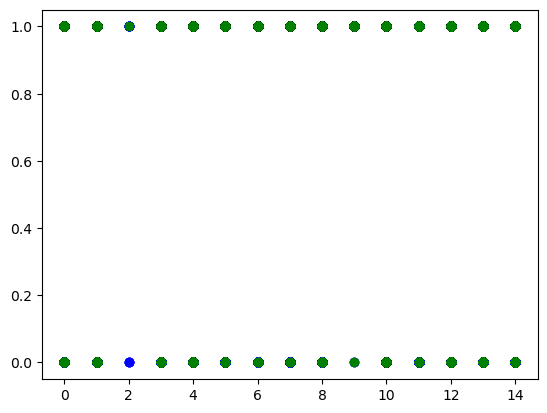

In [72]:
plt.scatter(df1['occupation'],df1['income'],color='blue')
plt.scatter(df3['occupation'],df3['income'],color='green')


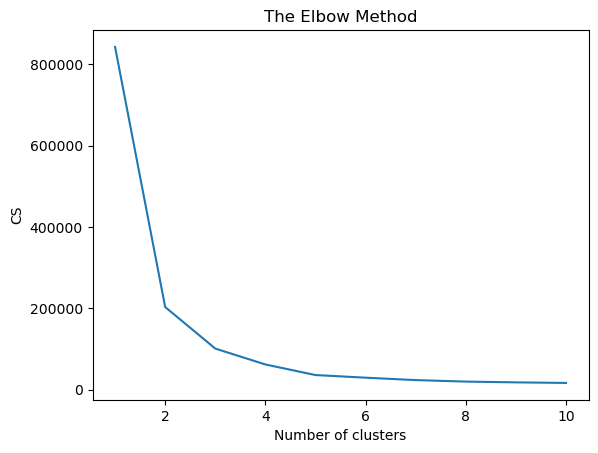

In [73]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Observation - kink at k=2.using elbow method since I got the bad model lets do the cluster again with the best fit of 2

In [86]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(x)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\Users\rajha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 23597 out of 47621 samples were correctly labeled.
Accuracy score: 0.50


Comment on K-means:
    I have implemented the most popular unsupervised clustering technique called K-Means Clustering.
    I have applied the elbow method and find that k=2 (k is number of clusters) can be considered a good number of cluster to cluster this data.
    We got the relatively high accuracy 50% for the model. But this model does not give the best performance. 
    Model has high interia not good fit. 